In [4]:
import cv2
import torch
from PIL import Image
import pandas as pd
import math
import numpy as np

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='weights/best.pt')  # custom model
model.conf = 0.75  # confidence threshold (0-1)
model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

Using cache found in C:\Users\HORUS/.cache\torch\hub\ultralytics_yolov5_master
Fusing layers... 
Model Summary: 308 layers, 21082089 parameters, 0 gradients, 50.5 GFLOPS
Adding autoShape... 
YOLOv5  2021-5-6 torch 1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3070, 8192.0MB)



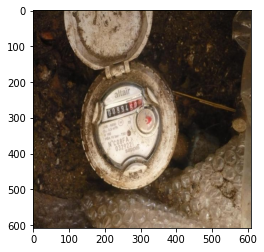

In [1]:
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
test_images = [f for f in os.listdir('./test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images)
imgs = cv2.imread(img_path)[:, :, ::-1]  # OpenCV image (BGR to RGB)
imgplot = plt.imshow(imgs)

In [4]:
 height, width, channels = imgs.shape
 print(height, width, channels)

608 608 3


In [14]:
imgs = cv2.imread(img_path)[:, :, ::-1]  # OpenCV image (BGR to RGB)

# Inference
results = model(imgs, size=608)  # includes NMS
#print(results.pandas().xyxy[0].to_json(orient="records"))  # JSON img1 predictions
# Results
results.render()
results.print()  
results.show()  # or .show()


results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
#      xmin    ymin    xmax   ymax  confidence  class    name

image 1/1: 608x608 2 0s, 1 1, 1 3, 1 7, 1 counter, 1 liters
Speed: 8.0ms pre-process, 11.0ms inference, 1.0ms NMS per image at shape (1, 3, 608, 608)


,xmin,ymin,xmax,ymax,confidence,class,name
0,138.250,255.875,414.750,304.00,0.927246,10,counter
1,315.750,269.500,403.250,293.00,0.897461,11,liters
2,146.750,268.250,171.750,293.75,0.868164,0,0
3,181.625,269.000,204.375,293.50,0.864258,0,0
4,248.875,270.250,270.250,295.25,0.858398,1,1
5,283.000,272.250,303.500,293.75,0.854980,3,3
6,213.500,268.250,238.500,293.25,0.851074,7,7


In [15]:
temp_df=results.pandas().xyxy[0] 
distance = []
max_iter = temp_df.shape[0]

index_liters = temp_df[temp_df['class']==11]. index
index_counter = temp_df[temp_df['class']==10]. index

if len(index_liters) == 1 :
    for i in range(max_iter):
      dist_x1y1 = math.sqrt(math.pow((temp_df.iloc[i]['xmin'] - temp_df.iloc[index_liters]['xmin']), 2) + \
                            math.pow((temp_df.iloc[i]['ymin'] - temp_df.iloc[index_liters]['ymin']), 2))

      distance.append(dist_x1y1)

    indexes_ordered = np.argsort(distance)[::-1]

elif len(index_counter) == 1:
    for i in range(max_iter):
      dist_x1y1 = math.sqrt(math.pow((temp_df.iloc[i]['xmin'] - temp_df.iloc[index_counter]['xmin']), 2) + \
                            math.pow((temp_df.iloc[i]['ymin'] - temp_df.iloc[index_counter]['ymin']), 2))

      distance.append(dist_x1y1)

      indexes_ordered = np.argsort(distance)
else:
    indexes_ordered = temp_df.index

class_ordered = [temp_df.iloc[index]['class'] for index in indexes_ordered]
class_ordered = [str(digit) for digit in class_ordered if digit not in [10, 11]]
print(int(''.join(class_ordered)))


713


## PANDAS DATAFRAME INDEX ORDERING

In [1]:
import pandas as pd
import math
import numpy as np

In [2]:
#temp_df.to_pickle("a_file.pkl")  #SAVE DATAFRAME

In [2]:
temp_df = pd.read_pickle("a_file.pkl")
temp_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,150.250,268.00,410.250,332.00,0.897461,10,counter
1,284.250,284.25,311.750,318.75,0.885742,1,1
2,257.000,283.50,281.000,317.50,0.874512,1,1
3,225.750,285.00,251.750,317.00,0.871094,3,3
4,325.000,281.50,395.500,311.50,0.869141,11,liters
5,196.375,285.50,220.625,318.50,0.867676,1,1
6,165.250,284.75,191.500,319.25,0.865723,0,0


In [3]:
distance = []
max_iter = temp_df.shape[0]

index_liters = temp_df[temp_df['class']==11]. index
index_counter = temp_df[temp_df['class']==10]. index

if len(index_liters) == 1 :
    for i in range(max_iter):
      dist_x1y1 = math.sqrt(math.pow((temp_df.iloc[i]['xmin'] - temp_df.iloc[index_liters]['xmin']), 2) + \
                            math.pow((temp_df.iloc[i]['ymin'] - temp_df.iloc[index_liters]['ymin']), 2))

      distance.append(dist_x1y1)

    indexes_ordered = np.argsort(distance)[::-1]

elif len(index_counter) == 1:
    for i in range(max_iter):
      dist_x1y1 = math.sqrt(math.pow((temp_df.iloc[i]['xmin'] - temp_df.iloc[index_counter]['xmin']), 2) + \
                            math.pow((temp_df.iloc[i]['ymin'] - temp_df.iloc[index_counter]['ymin']), 2))

      distance.append(dist_x1y1)

      indexes_ordered = np.argsort(distance)
else:
    indexes_ordered = temp_df.index

class_ordered = [temp_df.iloc[index]['class'] for index in indexes_ordered]
class_ordered = [str(digit) for digit in class_ordered if digit not in [10, 11]]

In [4]:
print(int(''.join(class_ordered)))

1311
